In [1]:
train_dir = 'data/train'
test_dir = 'data/test'
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=90,
                fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(512, 512),
                batch_size=5,
                class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(512, 512),
                batch_size=5,
                class_mode='binary',
                )

Using TensorFlow backend.


Found 852 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


In [2]:
from keras import layers
from keras import models
from keras import applications
model = models.Sequential()
conv_base = applications.VGG16(weights='imagenet', 
                               include_top=False, 
                               input_shape=[512, 512, 3]) 
conv_base.trainable = False
model.add(conv_base)
#model.add(layers.Conv2D(128, (10, 10), activation='relu'))
#model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 48,269,633
Trainable params: 33,554,945
Non-trainable params: 14,714,688
_________________________________________________________________


In [4]:
history = model.fit_generator(
                train_generator,
                steps_per_epoch=50,
                epochs=30,
                validation_data=validation_generator,
                validation_steps=40
                )

Epoch 1/30
50/50 [==============================] - 41s 827ms/step - loss: 0.8405 - acc: 0.5640 - val_loss: 0.8039 - val_acc: 0.5900
Epoch 2/30
50/50 [==============================] - 33s 661ms/step - loss: 0.6817 - acc: 0.6200 - val_loss: 0.6941 - val_acc: 0.5600
Epoch 3/30
50/50 [==============================] - 33s 667ms/step - loss: 0.5853 - acc: 0.6960 - val_loss: 0.8846 - val_acc: 0.5750
Epoch 4/30
50/50 [==============================] - 37s 738ms/step - loss: 0.5362 - acc: 0.7461 - val_loss: 1.2561 - val_acc: 0.5600
Epoch 5/30
50/50 [==============================] - 33s 666ms/step - loss: 0.5514 - acc: 0.7160 - val_loss: 0.7435 - val_acc: 0.5200
Epoch 6/30
50/50 [==============================] - 33s 651ms/step - loss: 0.4909 - acc: 0.7600 - val_loss: 0.8754 - val_acc: 0.5950
Epoch 7/30
50/50 [==============================] - 32s 645ms/step - loss: 0.4803 - acc: 0.7679 - val_loss: 0.8688 - val_acc: 0.4500
Epoch 8/30
50/50 [==============================] - 34s 678ms/step - 

In [5]:
model.save('bw.md')

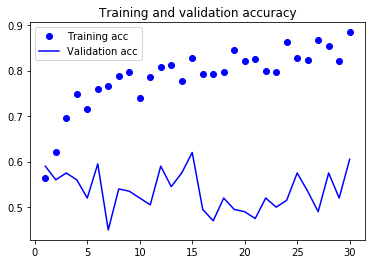

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

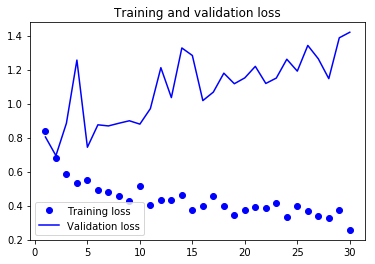

In [7]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size=(512, 512),
                batch_size=5,
                class_mode='binary',
                )

Found 93 images belonging to 2 classes.


In [19]:
score = model.evaluate_generator(validation_generator,93/5)
score

[1.2713345443048785, 0.6559139925946471]